이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/main/chapter08_intro-to-dl-for-computer-vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

# 컴퓨터 비전을 위한 딥러닝

## 합성곱 신경망 소개

**간단한 컨브넷 만들기**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**모델의 `summary()` 메서드 출력**

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

**MNIST 이미지에서 컨브넷 훈련하기**

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
938/938 [==============================] - 19s 6ms/step - loss: 0.1624 - accuracy: 0.9495
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0451 - accuracy: 0.9857
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0300 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0227 - accuracy: 0.9930
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0179 - accuracy: 0.9944


**컨브넷 평가하기**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc:.3f}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0249 - accuracy: 0.9914
테스트 정확도: 0.991


### 합성곱 연산

#### 경계 문제와 패딩 이해하기

#### 합성곱 스트라이등 이해하기

### 최대 풀링 연산

**최대 풀링 층이 빠진 잘못된 구조의 컨브넷**

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712202 (2.72 MB)
Trainable params: 712202 (2.

## 소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기

### 작은 데이터셋 문제에서 딥러닝의 타당성

### 데이터 내려받기

캐글에서 dogs-vs-cats 데이터셋을 다운로드하려면 캐글에 가입해야 한 후 생성한 API 키를 사용해야 합니다. 다운로드에 문제가 있다면 다음 명령으로 구글 드라이브에서 직접 다운로드할 수 있습니다.

In [2]:
import gdown
gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')

Downloading...
From (original): https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd
From (redirected): https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd&confirm=t&uuid=8ec010de-d838-4221-b9c1-9b32d754f7bf
To: /content/dogs-vs-cats.zip
100%|██████████| 852M/852M [00:14<00:00, 57.2MB/s]


'dogs-vs-cats.zip'

코랩의 Secrets 탭에 캐글 키를 저장해 놓았다면 다음처럼 노트북에서 불러올 수 있습니다. Secrets에 저장한 키 이름이 `'kaggle'`이라 가정합니다.

```python
from google.colab import userdata
key = userdata.get('kaggle')
with open('kaggle.json', 'w') as f:
    f.write(f'{{"username":"haesunpark","key":"{key}"}}')
```

또는 로컬 컴퓨터에 저장되어 있는 `'kaggle.json'` 파일을 직접 코랩에 업로드할 수 있습니다.
```python
# kaggle.json 파일을 업로드하세요.
from google.colab import files
files.upload()
```

`'kaggle.json'` 파일이 생성되었다면 적절한 위치로 이동시키고 파일 권한을 변경한 다음 캐글에서 데이터를 다운로드합니다.

```bash
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats
```

In [3]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

**이미지를 훈련, 검증, 테스트 디렉토리로 복사하기**

In [4]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

### 모델 만들기

**강아지 vs. 고양이 분류를 위한 소규모 컨브넷 만들기**

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

**모델 훈련 설정하기**

In [7]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### 데이터 전처리

**`image_dataset_from_directory`를 사용하여 이미지 읽기**

In [8]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [9]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [10]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [11]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [12]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**`Dataset`이 반환하는 데이터와 레이블 크기 확인하기**

In [13]:
for data_batch, labels_batch in train_dataset:
    print("데이터 배치 크기:", data_batch.shape)
    print("레이블 배치 크기:", labels_batch.shape)
    break

데이터 배치 크기: (32, 180, 180, 3)
레이블 배치 크기: (32,)


**`Dataset`을 사용해 모델 훈련하기**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.h5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 8s 112ms/step - loss: 0.6960 - accuracy: 0.5075 - val_loss: 0.6923 - val_accuracy: 0.4990
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 7s 108ms/step - loss: 0.6915 - accuracy: 0.5485 - val_loss: 0.6654 - val_accuracy: 0.5880
Epoch 3/30
63/63 [==============================] - 5s 66ms/step - loss: 0.6474 - accuracy: 0.6305 - val_loss: 0.6311 - val_accuracy: 0.6330
Epoch 4/30
63/63 [==============================] - 4s 57ms/step - loss: 0.6200 - accuracy: 0.6500 - val_loss: 0.5871 - val_accuracy: 0.6720
Epoch 5/30
63/63 [==============================] - 5s 73ms/step - loss: 0.5742 - accuracy: 0.7105 - val_loss: 0.6439 - val_accuracy: 0.6040
Epoch 6/30
63/63 [==============================] - 3s 52ms/step - loss: 0.5459 - accuracy: 0.7315 - val_loss: 0.6093 - val_accuracy: 0.6640
Epoch 7/30
63/63 [==============================] - 4s 55ms/step - loss: 0.5168 - accuracy: 0.7340 - val_loss: 0.6367 - val_accuracy: 0.6680
Epoch 8/30
63/63 [==============================] - 5s 77ms/step - loss: 0.4920 - accuracy: 0.7670 - val_loss: 0.5390 - val_accuracy: 0.7270
Epoch 9/30
63/63 [=====

**훈련 정확도와 손실 그래프 그리기**

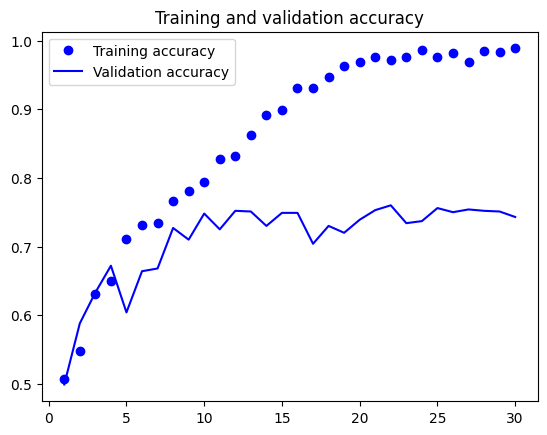

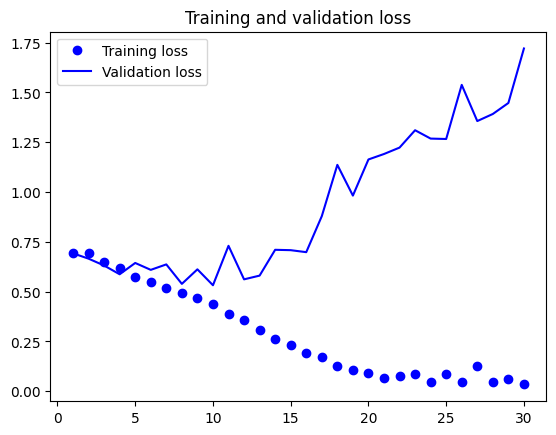

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**테스트 세트에서 모델 평가하기**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 2s 30ms/step - loss: 0.5597 - accuracy: 0.7390
테스트 정확도: 0.739


### 데이터 증식 사용하기

**컨브넷에 추가할 데이터 증식 단계 정의하기**

In [14]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**랜덤하게 증식된 훈련 이미지 출력하기**

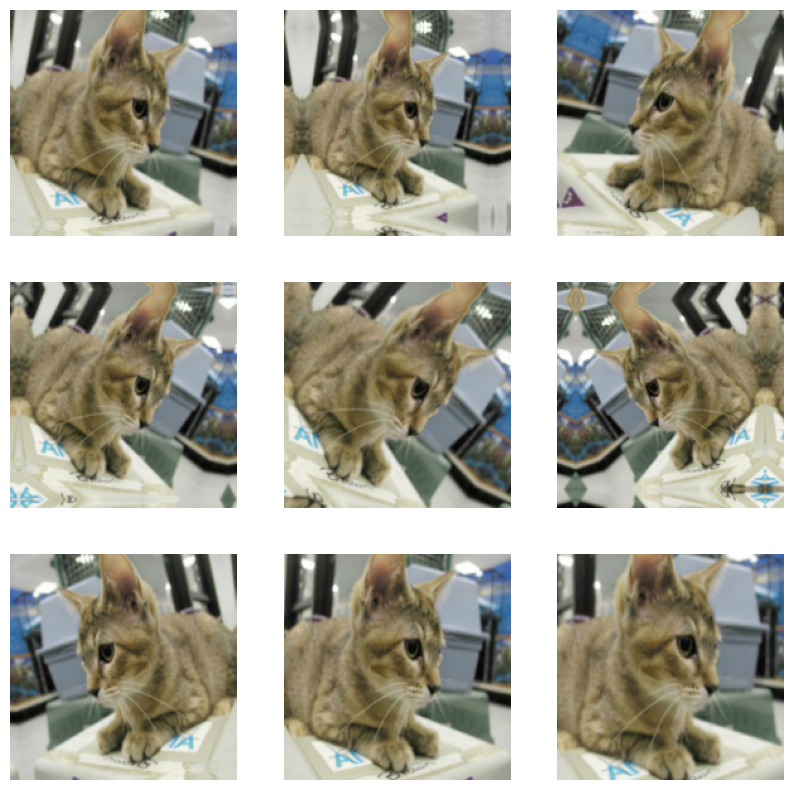

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**이미지 증식과 드롭아웃을 포함한 컨브넷 만들기**

In [17]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**규제를 추가한 컨브넷 훈련하기**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.h5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 8s 77ms/step - loss: 0.7003 - accuracy: 0.4970 - val_loss: 0.6922 - val_accuracy: 0.5020
Epoch 2/100
63/63 [==============================] - 4s 55ms/step - loss: 0.6937 - accuracy: 0.5080 - val_loss: 0.6897 - val_accuracy: 0.5370
Epoch 3/100
63/63 [==============================] - 4s 54ms/step - loss: 0.6907 - accuracy: 0.5300 - val_loss: 0.6883 - val_accuracy: 0.5070
Epoch 4/100
63/63 [==============================] - 6s 88ms/step - loss: 0.6805 - accuracy: 0.5845 - val_loss: 0.6627 - val_accuracy: 0.6190
Epoch 5/100
63/63 [==============================] - 4s 54ms/step - loss: 0.6598 - accuracy: 0.6230 - val_loss: 0.6515 - val_accuracy: 0.6140
Epoch 6/100
63/63 [==============================] - 5s 68ms/step - loss: 0.6410 - accuracy: 0.6235 - val_loss: 0.6611 - val_accuracy: 0.5910
Epoch 7/100
63/63 [==============================] - 6s 87ms/step - loss: 0.6371 - accuracy: 0.6405 - val_loss: 0.6536 - val_accuracy: 0.6020
Epoch 

**테스트 세트에서 모델 훈련하기**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 4s 47ms/step - loss: 0.4454 - accuracy: 0.8475
테스트 정확도: 0.848


## 사전 훈련된 모델 활용하기

### 사전 훈련된 모델을 사용한 특성 추출

**VGG16 합성곱 기반 층 만들기**

In [18]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [19]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### 데이터 증식을 사용하지 않는 빠른 특성 추출

**VGG16 특성과 해당 레이블 추출하기**

In [35]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 22ms/step


In [21]:
train_features.shape

(2000, 5, 5, 512)

In [32]:
# 이 부분 확인
dataset = train_dataset
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

In [22]:
preprocessed_images = keras.applications.vgg16.preprocess_input(images)

In [25]:
features = conv_base.predict(preprocessed_images)
features

1/1 [==============================] - 0s 52ms/step


array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          2.5475441e+01, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          4.9342327e+01, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 3.1550978e+01, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 3.5156467e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          6.6083226e+00, 0.0000000e+00, 1.0368365e+01],
         [0.0000000e+00, 0.0000000e+00, 2.9357128e+01, ...,
          1.7311199e+01, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          

In [23]:
preprocessed_images

<tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
array([[[[ 6.79200211e+01,  6.00800247e+01,  5.21790237e+01],
         [ 7.05609970e+01,  6.27210007e+01,  5.48199997e+01],
         [ 7.38109970e+01,  6.59710007e+01,  5.80699997e+01],
         ...,
         [ 5.95609970e+01,  4.67210007e+01,  3.98199997e+01],
         [ 5.45609970e+01,  4.17210007e+01,  3.48199997e+01],
         [ 5.84519730e+01,  3.91119766e+01,  3.32109756e+01]],

        [[ 6.91193314e+01,  6.12793350e+01,  5.33783340e+01],
         [ 7.18693314e+01,  6.40293350e+01,  5.61283340e+01],
         [ 7.51193314e+01,  6.72793350e+01,  5.93783340e+01],
         ...,
         [ 5.95609970e+01,  4.67210007e+01,  3.98199997e+01],
         [ 5.45609970e+01,  4.17210007e+01,  3.48199997e+01],
         [ 5.73109970e+01,  3.79710007e+01,  3.20699997e+01]],

        [[ 7.09915543e+01,  6.31515579e+01,  5.52505569e+01],
         [ 7.36964188e+01,  6.58564224e+01,  5.79554214e+01],
         [ 7.69915543e+01,  6.91515579e+0

**밀집 연결 분류기 정의하고 훈련하기**

In [36]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.h5",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 4s 11ms/step - loss: 18.9709 - accuracy: 0.9175 - val_loss: 5.1305 - val_accuracy: 0.9700
Epoch 2/20
26/63 [===========>..................] - ETA: 0s - loss: 1.5557 - accuracy: 0.9808

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 0s 7ms/step - loss: 2.8849 - accuracy: 0.9790 - val_loss: 3.9940 - val_accuracy: 0.9650
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 2.7159 - accuracy: 0.9825 - val_loss: 5.1515 - val_accuracy: 0.9680
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.8077 - accuracy: 0.9840 - val_loss: 7.5120 - val_accuracy: 0.9650
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.4905 - accuracy: 0.9890 - val_loss: 4.5399 - val_accuracy: 0.9700
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.3275 - accuracy: 0.9940 - val_loss: 5.7378 - val_accuracy: 0.9650
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.3157 - accuracy: 0.9965 - val_loss: 3.5330 - val_accuracy: 0.9780
Epoch 8/20
63/63 [==============================] - 1s 8ms/step - loss: 0.0748 - accuracy: 0.9990 - val_loss: 3.7198 - val_accuracy: 0.9790
Epoch 9/20
63/63 [=============

**결과를 그래프로 나타내기**

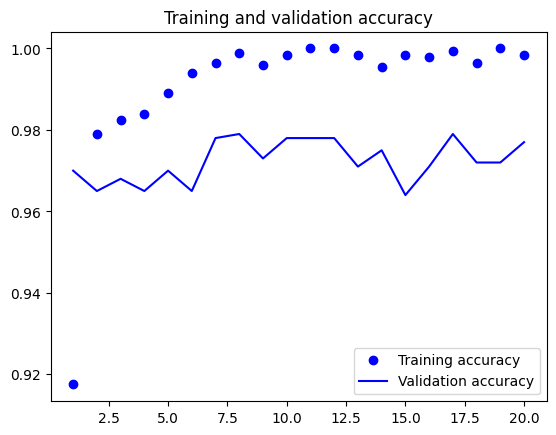

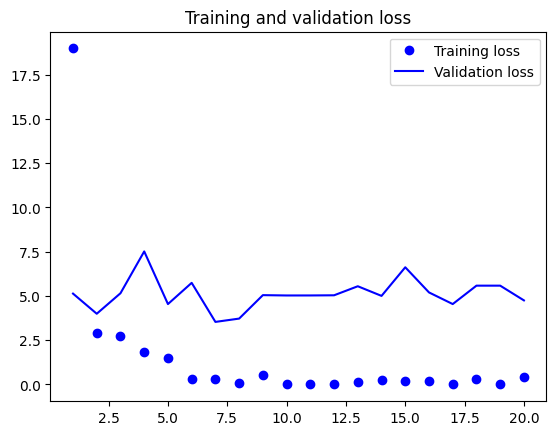

In [37]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction.h5")
test_loss, test_acc = test_model.evaluate(test_features,test_labels)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 0s 3ms/step - loss: 4.7459 - accuracy: 0.9690
테스트 정확도: 0.969


#### 데이터 증식을 사용한 특성 추출

**VGG16 합성곱 기반 층을 만들고 동결하기**

In [38]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**동결하기 전과 후에 훈련 가능한 가중치 리스트를 출력하기**

In [39]:
conv_base.trainable = True
print("합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수:",
      len(conv_base.trainable_weights))

합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수: 26


In [40]:
conv_base.trainable = False
print("합성곱 기반 층을 동결한 후의 훈련 가능한 가중치 개수:",
      len(conv_base.trainable_weights))

합성곱 기반 층을 동결한 후의 훈련 가능한 가중치 개수: 0


**데이터 증식 단계와 밀집 분류기를 합성곱 기반 층에 추가하기**

In [41]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [42]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.h5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 11s 156ms/step - loss: 19.2825 - accuracy: 0.8920 - val_loss: 4.9511 - val_accuracy: 0.9660
Epoch 2/50
63/63 [==============================] - 11s 179ms/step - loss: 8.0112 - accuracy: 0.9395 - val_loss: 2.2620 - val_accuracy: 0.9820
Epoch 3/50
63/63 [==============================] - 9s 142ms/step - loss: 5.8747 - accuracy: 0.9535 - val_loss: 3.8155 - val_accuracy: 0.9750
Epoch 4/50
63/63 [==============================] - 11s 177ms/step - loss: 4.7658 - accuracy: 0.9620 - val_loss: 2.6378 - val_accuracy: 0.9850
Epoch 5/50
63/63 [==============================] - 9s 142ms/step - loss: 3.5492 - accuracy: 0.9650 - val_loss: 5.0483 - val_accuracy: 0.9680
Epoch 6/50
63/63 [==============================] - 10s 153ms/step - loss: 5.0232 - accuracy: 0.9610 - val_loss: 2.3646 - val_accuracy: 0.9830
Epoch 7/50
63/63 [==============================] - 11s 178ms/step - loss: 3.0666 - accuracy: 0.9710 - val_loss: 4.0052 - val_accuracy: 0.9760


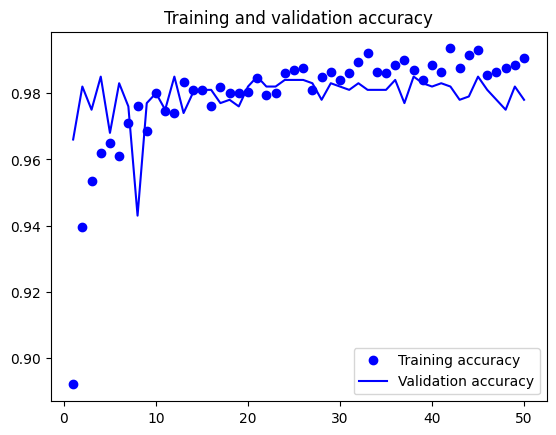

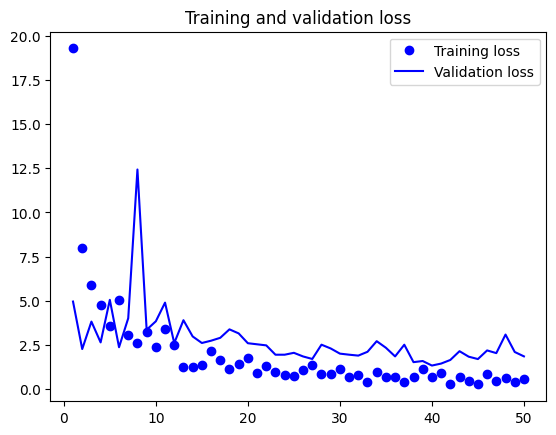

In [43]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**테스트 세트에서 모델 평가하기**

In [44]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 6s 92ms/step - loss: 2.1915 - accuracy: 0.9780
테스트 정확도: 0.978


### 사전 훈련된 모델 미세 조정하기

In [45]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**마지막에서 네 번째 층까지 모든 층 동결하기**

In [46]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**모델 미세 조정하기**

In [48]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.h5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
63/63 [==============================] - 15s 180ms/step - loss: 0.1763 - accuracy: 0.9940 - val_loss: 1.9092 - val_accuracy: 0.9780
Epoch 2/10
63/63 [==============================] - 11s 175ms/step - loss: 0.1553 - accuracy: 0.9950 - val_loss: 1.3679 - val_accuracy: 0.9800
Epoch 3/10
63/63 [==============================] - 12s 193ms/step - loss: 0.1682 - accuracy: 0.9945 - val_loss: 1.7140 - val_accuracy: 0.9770
Epoch 4/10
63/63 [==============================] - 10s 157ms/step - loss: 0.2380 - accuracy: 0.9915 - val_loss: 2.6759 - val_accuracy: 0.9730
Epoch 5/10
63/63 [==============================] - 11s 169ms/step - loss: 0.1600 - accuracy: 0.9950 - val_loss: 1.2410 - val_accuracy: 0.9830
Epoch 6/10
63/63 [==============================] - 10s 161ms/step - loss: 0.2762 - accuracy: 0.9950 - val_loss: 1.3906 - val_accuracy: 0.9820
Epoch 7/10
63/63 [==============================] - 11s 169ms/step - loss: 0.1033 - accuracy: 0.9945 - val_loss: 1.2627 - val_accuracy: 0.9830

In [49]:
model = keras.models.load_model("fine_tuning.h5")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 6s 92ms/step - loss: 1.9253 - accuracy: 0.9760
테스트 정확도: 0.976


## 요약